In [0]:
# retrieving the data form the url
import urllib.request
stringInURL = "https://www.gutenberg.org/files/65114/65114-0.txt"
urllib.request.urlretrieve(stringInURL, "/tmp/chandu.txt")

Out[8]: ('/tmp/chandu.txt', <http.client.HTTPMessage at 0x7fd2c588d520>)

In [0]:
# moving the data from tmp to dbfs
dbutils.fs.mv("file:/tmp/chandu.txt", "dbfs:/data/chandu.txt")

Out[9]: True

In [0]:
# transfering the file to a spark job 
RDD = sc.textFile("dbfs:/data/chandu.txt")

In [0]:
# Splitting the words with the " " and coneverting them into lower case.
textRDD = RDD.flatMap(lambda line : line.lower().strip().split(" "))

In [0]:
# map() words with intermediate key-value pairs.
import re
# removing punctutations.
cleanToken_RDD = textRDD.map(lambda words: re.sub(r'[^a-zA-Z]','',words))
# clean stopwords
from pyspark.ml.feature import StopWordsRemover
remove =StopWordsRemover()
stopWords = remove.getStopWords()
cleanData_RDD=cleanToken_RDD.filter(lambda wrds: wrds not in stopWords)
# spaces removing
Final_clean_DataRDD = cleanData_RDD.filter(lambda x: x != "")
#mapping the words to key value pairs
IKVPairsRDD= Final_clean_DataRDD.map(lambda word: (word,1))

In [0]:
# keyvalue pairs to wordcount
count_RDD = IKVPairsRDD.reduceByKey(lambda acc, value: acc+value)

In [0]:
# Sorting them in descending order and printing to check first 30 results
final_results = count_RDD.map(lambda x: (x[1], x[0])).sortByKey(False).take(10)
print(final_results)

[(288, 'light'), (208, 'one'), (195, 'may'), (169, 'eye'), (167, 'see'), (159, 'two'), (142, 'rays'), (142, 'fig'), (135, 'upon'), (128, 'first')]

In [0]:
# this is the action to get back into python
results = count_RDD.collect()
print(results)

[('project', 89), ('gutenberg', 31), ('ebook', 13), ('wonders', 17), ('marion', 4), ('use', 43), ('anyone', 5), ('anywhere', 2), ('united', 18), ('world', 19), ('restrictions', 2), ('whatsoever', 2), ('may', 195), ('give', 36), ('away', 15), ('reuse', 2), ('online', 5), ('check', 5), ('country', 8), ('using', 19), ('title', 1), ('quin', 2), ('april', 4), ('language', 2), ('set', 26), ('encoding', 1), ('utf', 1), ('produced', 41), ('deaurider', 1), ('team', 1), ('generously', 1), ('internet', 1), ('archive', 14), ('start', 3), ('showing', 24), ('power', 82), ('sodium', 14), ('vapour', 10), ('action', 33), ('prism', 43), ('robin', 5), ('ny', 1), ('translated', 2), ('edited', 1), ('illustrated', 2), ('wood', 11), ('frontispiece', 7), ('new', 26), ('york', 3), ('scribners', 1), ('successors', 3), ('armstrong', 1), ('co', 1), ('preface', 1), ('work', 61), ('needs', 2), ('introduction', 5), ('public', 8), ('holds', 2), ('high', 12), ('official', 5), ('scientific', 6), ('position', 59), ('paris', 16), ('known', 37), ('especially', 8), ('europe', 1), ('rule', 4), ('strictly', 3), ('instances', 18), ('certain', 63), ('altered', 4), ('make', 21), ('room', 31), ('chapter', 67), ('spectroscope', 6), ('contents', 1), ('phenomena', 16), ('vision', 27), ('page', 10), ('iii', 8), ('errors', 9), ('iv', 8), ('appreciation', 2), ('colour', 77), ('vi', 6), ('caused', 23), ('influence', 13), ('imagination', 27), ('causes', 13), ('luminous', 55), ('reflectionmirrors', 2), ('burning', 29), ('mirrors', 70), ('lenses', 63), ('simple', 33), ('compound', 12), ('telescopes', 17), ('galileo', 12), ('gregory', 3), ('rosse', 5), ('foucault', 5), ('phantasmagoria', 20), ('chinese', 4), ('shadows', 19), ('lucida', 7), ('ghost', 14), ('illusion', 27), ('phenakistiscope', 8), ('disc', 16), ('absorption', 3), ('ib', 7), ('rays', 142), ('recomposition', 6), ('means', 68), ('mirror', 112), ('newtons', 6), ('rings', 11), ('proof', 9), ('water', 29), ('conjugate', 8), ('effect', 52), ('path', 21), ('formed', 42), ('cannon', 4), ('palais', 5), ('fresnels', 3), ('lighthouse', 7), ('galilean', 4), ('astronomical', 13), ('gregorian', 8), ('herschellian', 5), ('large', 43), ('wizard', 2), ('mdicis', 3), ('arrangement', 16), ('brick', 5), ('protection', 4), ('illnatured', 2), ('anamorphosis', 3), ('cut', 23), ('seditious', 3), ('diorama', 4), ('refracting', 10), ('produce', 32), ('wonderful', 21), ('useful', 5), ('knowledge', 17), ('senses', 12), ('far', 21), ('limited', 9), ('thus', 46), ('touch', 11), ('extends', 3), ('modification', 2), ('smell', 2), ('exercised', 4), ('substances', 15), ('close', 11), ('us', 106), ('ears', 3), ('distance', 74), ('sound', 14), ('ceases', 2), ('impress', 1), ('privilege', 1), ('dominion', 1), ('beyond', 33), ('origin', 10), ('upon', 135), ('reveal', 2), ('thanks', 3), ('modern', 15), ('science', 23), ('able', 14), ('infinite', 13), ('minuteness', 1), ('unknown', 10), ('centuries', 2), ('immeasurable', 1), ('universe', 2), ('admirable', 3), ('possession', 9), ('capable', 32), ('particular', 30), ('beauties', 4), ('speak', 19), ('internal', 4), ('consider', 8), ('let', 16), ('appearance', 25), ('never', 21), ('gentle', 2), ('eyes', 108), ('orbs', 2), ('veiled', 1), ('long', 48), ('dark', 50), ('lashes', 2), ('wondrous', 1), ('heavens', 5), ('depth', 2), ('whose', 53), ('mute', 1), ('eloquence', 2), ('irresistible', 1), ('true', 26), ('canvas', 2), ('mind', 40), ('central', 5), ('point', 72), ('undisturbed', 1), ('says', 17), ('state', 32), ('repose', 1), ('indicate', 3), ('pleasing', 4), ('harmony', 2), ('perfect', 16), ('human', 16), ('living', 11), ('passions', 3), ('equal', 16), ('delicacy', 3), ('letter', 7), ('quickness', 4), ('impression', 19), ('outstrips', 1), ('reveals', 1), ('signs', 3), ('image', 84), ('secret', 5), ('trouble', 3), ('expresses', 2), ('obedience', 1), ('emotions', 1), ('sentiments', 1), ('reproduces', 1), ('sprung', 1), ('existence', 13), ('transmits', 2), ('even', 55), ('minds', 7), ('others', 39), ('become', 2

Count Words
0 project 89
1 gutenberg 31
2 ebook 13
3 wonders 17
4 marion 4
... ... ...
6358 methods 1
6359 main 1
6360 pg 1
6361 includes 1
6362 newsletter 1

[6363 rows x 2 columns]
Out[21]:

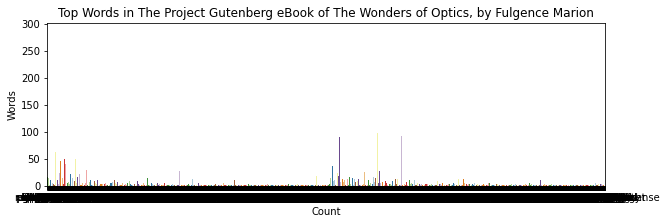

Text(0.5, 1.0, 'Top Words in The Project Gutenberg eBook of The Wonders of Optics, by Fulgence Marion')

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
 
source = 'The Project Gutenberg eBook of The Wonders of Optics, by Fulgence Marion'
title = 'Top Words in ' + source
xlabel = 'Count'
ylabel = 'Words'
 
# create Pandas dataframe from list of tuples
df = pd.DataFrame.from_records(results, columns =[xlabel, ylabel]) 
print(df)
 
# create plot (using matplotlib)
plt.figure(figsize=(10,3))
sns.barplot(xlabel, ylabel, data=df, palette="Paired").set_title(title)